# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Aggregate Data with Loops

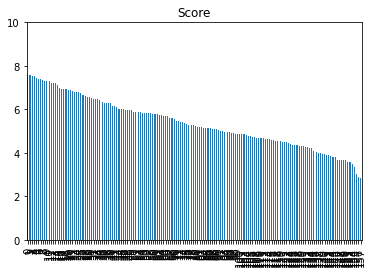

In [5]:
happiness2015["Happiness Score"].plot(kind="bar", title="Score", ylim=(0,10))
plt.show()

In [7]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [8]:
so_asia = happiness2015[happiness2015["Region"] == "Southern Asia"]

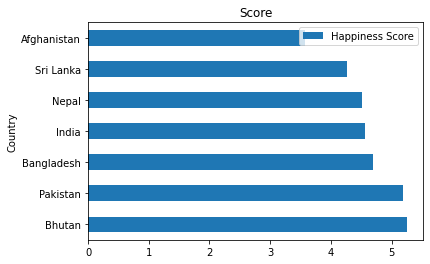

In [10]:
so_asia.plot(x="Country", y="Happiness Score", kind="barh", title="Score", ylim=(0,10))
plt.show()

In [11]:
so_asia["Happiness Score"].mean()

4.580857142857143

In [12]:
mean_happiness = {}

for region in happiness2015["Region"].unique():
    region_group =  happiness2015[happiness2015["Region"] == region]
    region_mean = region_group["Happiness Score"].mean()
    mean_happiness[region] = region_mean

In [13]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### GroupBy Operation

In [ ]:
mean_happiness = {}

for region in happiness2015["Region"].unique():
    # 1. df razdelimo na skupine
    region_group =  happiness2015[happiness2015["Region"] == region]
    # 2. zaženemo funkcijo nad posamezno skupino
    region_mean = region_group["Happiness Score"].mean()
    # 3. združimo podatke v končni podatkovni tip
    mean_happiness[region] = region_mean

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

In [14]:
happiness2015["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [15]:
happiness2015.groupby("Region")

In [16]:
gruped = happiness2015.groupby("Region")

In [20]:
gruped.get_group("Western Europe").head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [21]:
gruped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [22]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### Common Aggregation Methods

In [23]:
gruped = happiness2015.groupby("Region")
gruped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

<table class="dataframe"> <thead> <tr> <th>Methods</th> <th>Description</th> </tr> </thead> <tbody> <tr> <th>mean()</th> <td>Calculates the mean of groups.</td> </tr> <tr> <th>sum()</th> <td>Calculates the sum of group values.</td> </tr> <tr> <th>size()</th> <td>Calculates the size of the groups.</td> </tr> <tr> <th>count()</th> <td>Calculates the count of values in groups.</td> </tr> <tr> <th>min()</th> <td>Calculates the minimum of group values.</td> </tr> <tr> <th>max()</th> <td>Calculates the maximum of group values.</td> </tr> </tbody> </table>

In [25]:
gruped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [26]:
gruped = happiness2015.groupby("Region")
happy_score_group = gruped["Happiness Score"]
happy_score_group.mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [27]:
# krajši način
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

#### Agg() Method

In [28]:
import numpy as np

In [29]:
def dif(group):
    return (group.max() - group.mean())

In [33]:
happiness2015.groupby("Region")['Happiness Score'].agg([np.mean, np.max, dif])

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


In [34]:
happiness2015.groupby("Region")['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

### Pivot Tables

<img src="./images/PV_Syntax.svg">

In [38]:
pv_hapiness =  happiness2015.pivot_table(values='Happiness Score', index="Region", aggfunc=np.mean, margins=True)

In [40]:
pv_hapiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


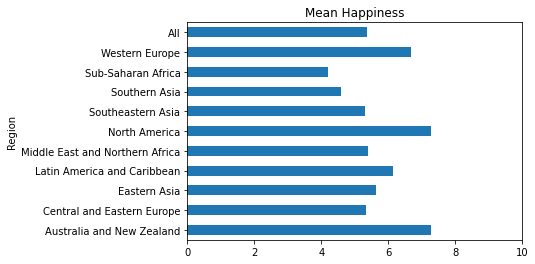

In [39]:
pv_hapiness.plot(kind="barh", 
                title="Mean Happiness",
                xlim = (0,10),
                legend=False)

plt.show()

## Pandas DataFrame all() Method

In [42]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [43]:
happiness2015.all()

Country                           True
Region                            True
Happiness Rank                    True
Happiness Score                   True
Standard Error                    True
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                 True
dtype: bool

In [44]:
happiness2015[happiness2015["Generosity"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [45]:
happiness2015.all(axis="columns").head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

## Combining Data

In [46]:
happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [47]:
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017

In [50]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [51]:
head_2015 = happiness2015[['Year','Country','Happiness Score']].head()
head_2016 = happiness2016[['Year','Country','Happiness Score']].head()

In [52]:
head_2015

,Year,Country,Happiness Score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427


In [53]:
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501
3,2016,Norway,7.498
4,2016,Finland,7.413


In [54]:
pd.concat([head_2015, head_2016], axis=0)

,Year,Country,Happiness Score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501
3,2016,Norway,7.498
4,2016,Finland,7.413


In [55]:
pd.concat([head_2015, head_2016], axis=1)

,Year,Country,Happiness Score,Year,Country,Happiness Score
0,2015,Switzerland,7.587,2016,Denmark,7.526
1,2015,Iceland,7.561,2016,Switzerland,7.509
2,2015,Denmark,7.527,2016,Iceland,7.501
3,2015,Norway,7.522,2016,Norway,7.498
4,2015,Canada,7.427,2016,Finland,7.413


In [59]:
head_2015 = happiness2015[['Year','Country','Happiness Score']].head()
head_2016 = happiness2016[['Year','Country','Happiness Score']].head()
head_2015.loc[0, "Happiness Score"] = "Test"
head_2015

pd.concat([head_2015, head_2016], axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             10 non-null     int64 
 1   Country          10 non-null     object
 2   Happiness Score  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [60]:
# novi podatki
subjects = ['Year','Country','Happiness Score', 'Standard Error']
head_2015 = happiness2015[subjects].head(4)
head_2016 = happiness2016[['Year','Country','Happiness Score']].head(3)

In [61]:
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [62]:
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501


In [65]:
pd.concat([head_2015, head_2016], axis=0, sort=True)

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


In [67]:
pd.concat([head_2015, head_2016], axis=0, sort=True, ignore_index=True)

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


In [71]:
pd.concat([head_2015, head_2016], axis=1, sort=True, verify_integrity=False)

,Year,Country,Happiness Score,Standard Error,Year,Country,Happiness Score
0,2015,Switzerland,7.587,0.03411,2016.0,Denmark,7.526
1,2015,Iceland,7.561,0.04884,2016.0,Switzerland,7.509
2,2015,Denmark,7.527,0.03328,2016.0,Iceland,7.501
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


In [69]:
a = pd.concat([head_2015, head_2016], axis=1, sort=True)
a["Year"]

,Year,Year
0,2015,2016.0
1,2015,2016.0
2,2015,2016.0
3,2015,NaN


<img src="./images/Concat_DifShapes.svg">

### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [72]:
three_2015 = happiness2015[['Year','Country','Happiness Rank']].iloc[2:5]
three_2016 = happiness2016[['Year','Country','Happiness Rank']].iloc[2:5]

In [74]:
three_2015

,Year,Country,Happiness Rank
2,2015,Denmark,3
3,2015,Norway,4
4,2015,Canada,5


In [75]:
three_2016

,Year,Country,Happiness Rank
2,2016,Iceland,3
3,2016,Norway,4
4,2016,Finland,5


In [73]:
pd.merge(left=three_2015, right=three_2016, on="Country")

,Year_x,Country,Happiness Rank_x,Year_y,Happiness Rank_y
0,2015,Norway,4,2016,4


In [76]:
pd.merge(left=three_2015, right=three_2016, on="Country", how="left")

,Year_x,Country,Happiness Rank_x,Year_y,Happiness Rank_y
0,2015,Denmark,3,NaN,NaN
1,2015,Norway,4,2016.0,4.0
2,2015,Canada,5,NaN,NaN


In [78]:
pd.merge(left=three_2016, right=three_2015, on="Country", how="right")

,Year_x,Country,Happiness Rank_x,Year_y,Happiness Rank_y
0,NaN,Denmark,NaN,2015,3
1,2016.0,Norway,4.0,2015,4
2,NaN,Canada,NaN,2015,5


In [79]:
pd.merge(left=three_2016, right=three_2015, on="Country", how="outer")

,Year_x,Country,Happiness Rank_x,Year_y,Happiness Rank_y
0,2016.0,Iceland,3.0,NaN,NaN
1,2016.0,Norway,4.0,2015.0,4.0
2,2016.0,Finland,5.0,NaN,NaN
3,NaN,Denmark,NaN,2015.0,3.0
4,NaN,Canada,NaN,2015.0,5.0


In [81]:
pd.merge(left=three_2015, right=three_2016, on="Country", how="left", suffixes=("_2015", "_2016"))

,Year_2015,Country,Happiness Rank_2015,Year_2016,Happiness Rank_2016
0,2015,Denmark,3,NaN,NaN
1,2015,Norway,4,2016.0,4.0
2,2015,Canada,5,NaN,NaN


#### Join on Index

<img src="./images/Index.svg">

In [83]:
four_2015 = happiness2015[['Year','Country','Happiness Rank']].iloc[2:6]
three_2016 = happiness2016[['Year','Country','Happiness Rank']].iloc[2:5]

In [84]:
four_2015

,Year,Country,Happiness Rank
2,2015,Denmark,3
3,2015,Norway,4
4,2015,Canada,5
5,2015,Finland,6


In [85]:
three_2016

,Year,Country,Happiness Rank
2,2016,Iceland,3
3,2016,Norway,4
4,2016,Finland,5


In [86]:
pd.merge(left=three_2015, right=three_2016, left_index=True, right_index=True, suffixes=("_2015", "_2016"))

,Year_2015,Country_2015,Happiness Rank_2015,Year_2016,Country_2016,Happiness Rank_2016
2,2015,Denmark,3,2016,Iceland,3
3,2015,Norway,4,2016,Norway,4
4,2015,Canada,5,2016,Finland,5


In [87]:
pd.merge(left=three_2015, right=three_2016, left_index=True, right_index=True, suffixes=("_2015", "_2016"), how="left")

,Year_2015,Country_2015,Happiness Rank_2015,Year_2016,Country_2016,Happiness Rank_2016
2,2015,Denmark,3,2016,Iceland,3
3,2015,Norway,4,2016,Norway,4
4,2015,Canada,5,2016,Finland,5


### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [90]:
happiness2017.rename(columns={"Happiness.Score": "Happiness Score"}, inplace=True)

In [91]:
combiend = pd.concat([happiness2015, happiness2016, happiness2017], sort=True)

In [92]:
combiend.head()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.33095,0.66973,0.34699,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.32261,0.63297,0.45811,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015


In [93]:
pivot_table_combined = combiend.pivot_table(values="Happiness Score", index="Year", aggfunc=np.mean) 

In [94]:
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


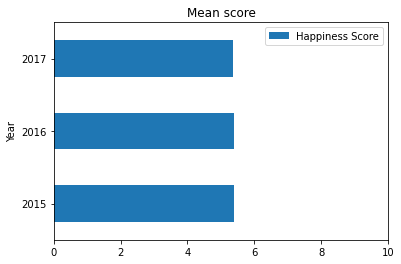

In [96]:
pivot_table_combined.plot(kind="barh", title="Mean score", xlim=(0,10))
plt.show()

## Transforming Data

In [97]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [98]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [99]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust'}

In [100]:
happiness2015 = happiness2015.rename(mapping, axis=1)

In [101]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


### Map and Apply Methods (Element-wise)

In [110]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

In [108]:
happiness2015["Economy Impact"] =  happiness2015["Economy"].map(label)
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High


In [109]:
happiness2015["Economy Impact"] =  happiness2015["Economy"].apply(label)
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High


<img src="./images/Map.svg">

In [111]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [112]:
happiness2015["Economy Impact"] =  happiness2015["Economy"].map(label, x=0.8)

TypeError: map() got an unexpected keyword argument 'x'

In [113]:
happiness2015["Economy Impact"] =  happiness2015["Economy"].apply(label, x=0.8)
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High


In [118]:
happiness2015["Economy Impact"] = happiness2015["Economy"].apply(lambda row: label(row, x=0.8))
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High


### Applymap Method (Element-wise to Multiple Columns)

In [119]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [120]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

In [121]:
factors_impact = happiness2015[factors].applymap(label)

In [122]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

### Apply Method (along an Axis)

In [123]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


<img src="./images/Apply_counts.svg">

In [129]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']


#happiness2015[factors].apply(label, axis=1)

In [130]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

In [131]:
factors_impact.apply(v_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [147]:
def label_sum(row, x):
    element = row["Freedom"] + row["Trust"]
    if element > x:
        return 'High'
    else:
        return 'Low'

happiness2015["Economy Impact"] = happiness2015.apply(lambda row: label_sum(row, x=0.8), axis = 1)
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low


    axis{0 or ‘index’, 1 or ‘columns’}, default 0
    Axis along which the function is applied:

    0 or ‘index’: apply function to each column.

    1 or ‘columns’: apply function to each row.

### Melt Function

In [150]:
happy_two = happiness2015.head(2)
happy_two

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy_tag,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low


In [151]:
pd.melt(happy_two, id_vars=["Country", "Region"], value_vars=['Economy', 'Family', 'Health'])

,Country,Region,variable,value
0,Switzerland,Western Europe,Economy,1.39651
1,Iceland,Western Europe,Economy,1.30232
2,Switzerland,Western Europe,Family,1.34951
3,Iceland,Western Europe,Family,1.40223
4,Switzerland,Western Europe,Health,0.94143
5,Iceland,Western Europe,Health,0.94784


<img src="./images/Melt_Syntax.svg">

In [153]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [154]:
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

In [155]:
melt.head(10)

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
5,Finland,Western Europe,6,7.406,Economy,1.29025
6,Netherlands,Western Europe,7,7.378,Economy,1.32944
7,Sweden,Western Europe,8,7.364,Economy,1.33171
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358


In [156]:
melt["Percentage"] = round((melt["value"] / melt["Happiness Score"]) *100, 2)

In [157]:
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


In [163]:
melt.sort_values(by="Percentage", ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
1095,Central African Republic,Sub-Saharan Africa,148,3.678,Dystopia Residual,2.72230,74.02
1078,Malawi,Sub-Saharan Africa,131,4.292,Dystopia Residual,2.80791,65.42
1067,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,Dystopia Residual,2.86712,63.47
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10
1041,Mozambique,Sub-Saharan Africa,94,4.971,Dystopia Residual,3.05137,61.38


### Primer: Aggregate the Data and Create a Visualization

In [165]:
pv_melt = melt.pivot_table(index="variable", values="value", aggfunc=np.mean)
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


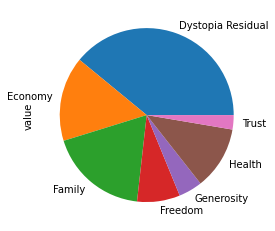

In [167]:
pv_melt.plot(kind="pie", y="value", legend=False)
plt.show()


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

## Vaja

In [169]:
import pandas as pd
import json

json_data_path = "./data/honeypot.json"

def load_raw_dataframe(file_path: str) -> pd.DataFrame:
    with open(file_path, "r") as log_file:
        data = log_file.readlines()
    
    data = [json.loads(line) for line in data]
    df = pd.DataFrame(data)
    return df

In [171]:
honeypot_data = load_raw_dataframe(json_data_path)

In [172]:
honeypot_data.head()

,honeypot_id,session,dst_port,technology,timestamp,method,url,src_ip,headers,ip_longitude,ip_latitude,country_name
0,cyberlab_local_01_prod_212_101_137_37,ed4aa370e653c758,9000,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T17:02:44.728,GET,http://212.101.137.37:9000/favicon.ico,185.220.101.129,"{'host': '212.101.137.37:9000', 'user-agent': ...",9.491,51.2993,Germany
1,cyberlab_local_00_prod_212_101_137_36,eda625fe98d2afd4,8088,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T14:35:41.779,GET,http://212.101.137.36:8088/,92.118.161.9,"{'host': '212.101.137.36:8088', 'user-agent': ...",24.000,56.0000,Republic of Lithuania
2,cyberlab_local_01_prod_212_101_137_37,62739085ffd318cb,80,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T16:40:30.723,GET,http://212.101.137.37:80/,185.173.35.33,"{'host': '212.101.137.37:80', 'user-agent': 'N...",9.491,51.2993,Germany
3,cyberlab_local_00_prod_212_101_137_36,cea36ece5286e2a4,88,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T13:44:35.420,GET,http://212.101.137.36:88/,162.142.125.53,{'host': '212.101.137.36:88'},-97.822,37.7510,United States
4,cyberlab_local_00_prod_212_101_137_36,cb50aaf1cee7557c,8020,hikvision_ip_dome_v4.0.1_build_190820,2021-08-11T13:33:23.849,GET,http://212.101.137.36:8020/,185.173.35.33,"{'host': '212.101.137.36:8020', 'user-agent': ...",9.491,51.2993,Germany


In [173]:
honeypot_data = honeypot_data.loc[:, ["session", "url", "src_ip", "country_name"]]

In [174]:
honeypot_data.head()

,session,url,src_ip,country_name
0,ed4aa370e653c758,http://212.101.137.37:9000/favicon.ico,185.220.101.129,Germany
1,eda625fe98d2afd4,http://212.101.137.36:8088/,92.118.161.9,Republic of Lithuania
2,62739085ffd318cb,http://212.101.137.37:80/,185.173.35.33,Germany
3,cea36ece5286e2a4,http://212.101.137.36:88/,162.142.125.53,United States
4,cb50aaf1cee7557c,http://212.101.137.36:8020/,185.173.35.33,Germany


In [181]:
# boolean za url za IP 212.101.137.37
honeypot_data["ip_37"] = honeypot_data["url"].str.contains("212.101.137.37")
# src ip se začne 209.97.
honeypot_data["ip_starts"] = honeypot_data["src_ip"].str.startswith("209.97.")
# država United Kingdom
honeypot_data["is_uk"] = honeypot_data["country_name"] == "United Kingdom" 

In [184]:
honeypot_data.head()

,session,url,src_ip,country_name,ip_37,ip_starts,is_uk
0,ed4aa370e653c758,http://212.101.137.37:9000/favicon.ico,185.220.101.129,Germany,True,False,False
1,eda625fe98d2afd4,http://212.101.137.36:8088/,92.118.161.9,Republic of Lithuania,False,False,False
2,62739085ffd318cb,http://212.101.137.37:80/,185.173.35.33,Germany,True,False,False
3,cea36ece5286e2a4,http://212.101.137.36:88/,162.142.125.53,United States,False,False,False
4,cb50aaf1cee7557c,http://212.101.137.36:8020/,185.173.35.33,Germany,False,False,False


In [192]:
filtered_data = honeypot_data[honeypot_data[["ip_37", "ip_starts", "is_uk"]].all(axis="columns")].copy()
filtered_data.head()

,session,url,src_ip,country_name,ip_37,ip_starts,is_uk
61,991706380bfd89c4,http://212.101.137.37:9010/system_api.php,209.97.140.102,United Kingdom,True,True,True
62,e6ca6764554e30be,http://212.101.137.37:9016/system_api.php,209.97.140.102,United Kingdom,True,True,True
63,743668e6481a3b3d,http://212.101.137.37:9020/system_api.php,209.97.140.102,United Kingdom,True,True,True
64,b6b688ad1e087f50,http://212.101.137.37:9030/system_api.php,209.97.140.102,United Kingdom,True,True,True
65,36a96fe32c04d782,http://212.101.137.37:8008/system_api.php,209.97.140.102,United Kingdom,True,True,True


In [193]:
import re

url_path_regex = re.compile(r"https?:\/\/.+?(\/.*)")

def extract_url_path(full_url: str) -> str:
    if full_url.startswith("/"):
        return full_url
    try:
        return url_path_regex.search(full_url).group(1)
    except AttributeError:
        return "/"

In [194]:
filtered_data["clean_url"] = filtered_data.apply(lambda row: extract_url_path(row["url"]), axis=1)
filtered_data.head()

,session,url,src_ip,country_name,ip_37,ip_starts,is_uk,clean_url
61,991706380bfd89c4,http://212.101.137.37:9010/system_api.php,209.97.140.102,United Kingdom,True,True,True,/system_api.php
62,e6ca6764554e30be,http://212.101.137.37:9016/system_api.php,209.97.140.102,United Kingdom,True,True,True,/system_api.php
63,743668e6481a3b3d,http://212.101.137.37:9020/system_api.php,209.97.140.102,United Kingdom,True,True,True,/system_api.php
64,b6b688ad1e087f50,http://212.101.137.37:9030/system_api.php,209.97.140.102,United Kingdom,True,True,True,/system_api.php
65,36a96fe32c04d782,http://212.101.137.37:8008/system_api.php,209.97.140.102,United Kingdom,True,True,True,/system_api.php


In [195]:
filtered_data["clean_url"].unique()

array(['/system_api.php', '/c/version.js', '/streaming/clients_live.php',
       '/stalker_portal/c/version.js', '/stream/live.php',
       '/flu/403.html'], dtype=object)